CS3920 Assignment 1

___
functions

In [1]:
import numpy as np
import math as mt
from collections import Counter
from heapq import nsmallest


def inner_product(x:list, y:list)->float:
    """Calculate inner product of two vector

    Args:
        x1 (list): 1d vector array
        y1 (list): 1d vector array

    Returns:
        float: inner product of two vector
    """
    return np.dot(x, y)


def euclidean_distance(x:list, y:list) -> float:
    """distance between two point

    Args:
        x (list): vector array
        y (list): vector array

    Returns:
        float: distance of difference of two vector
    """
    return (np.dot(x,x)-2*np.dot(x,y)+np.dot(y,y))

def ec(x, y) -> float:
    """distance between two point

    Args:
        x (list): vector array
        y (list): vector array

    Returns:
        float: distance of difference of two vector
    """
    return np.sum((x - y) ** 2)


def most_frequent(list:list):
    """return the most frequent element from the list

    Args:
        list (list): list

    Returns:
        _type_: _description_
    """
    return Counter(list).most_common(1)[0][0]


def indice_sort2(b):
    return np.argsort(b)

def indice_sort(pq, k):
    """return index of elements when the list is sorted

    Args:
        pq (list): list to be sorted
        k (int): numbers of elements wanted to be sorted

    Returns:
        list: indice of sorted elements
    """
    c=[[pq[i],i] for i in range(len(pq))]
    return [i[1] for i in nsmallest(k, c, key=lambda x: x[0])]







___
test function

In [2]:
import time
def time_func(predicate, x):
    """test function for runtime of another function

    Args:
        predicate (function): function for test
        x (set): input arguments

    Returns:
        set: value and runtime
    """
    start = time.time()
    x =predicate(*x)
    y =(time.time() - start)
    print("Result of run test: ", x)
    print("Run time of test: ",y)
    return (x,y)


a=[70, 78, 26, 30, 2, 89, 56, 92, 82, 60, 21, 66, 37, 38, 36, 40, 83, 88, 64]
aa=np.array(a)
b=[9, 6, 22, 39, 94, 70, 52, 72, 7, 98, 82, 0, 5, 3, 20, 38, 90, 30, 76]
bb=np.array(b)
cc=np.array([3,4,6])
print(time_func(euclidean_distance,(a, b)))
print(time_func(ec,(aa, bb)))
print(indice_sort(b,3))
print(indice_sort2(b))
print(time_func(indice_sort,[b,3]))
print(time_func(indice_sort2,[b]))


Result of run test:  39455
Run time of test:  0.0
(39455, 0.0)
Result of run test:  39455
Run time of test:  0.0
(39455, 0.0)
[11, 13, 12]
[11 13 12  1  8  0 14  2 17 15  3  6  5  7 18 10 16  4  9]
Result of run test:  [11, 13, 12]
Run time of test:  0.0
([11, 13, 12], 0.0)
Result of run test:  [11 13 12  1  8  0 14  2 17 15  3  6  5  7 18 10 16  4  9]
Run time of test:  0.0
(array([11, 13, 12,  1,  8,  0, 14,  2, 17, 15,  3,  6,  5,  7, 18, 10, 16,
        4,  9], dtype=int64), 0.0)


___
K Nearest Neighbours class

In [3]:
class KNN:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train=X
        self.y_train=y

    def predict(self, X):
        predicted_sample = [self._predict(x) for x in X]
        return np.array(predicted_sample)



    def _predict(self, x):
        # compute distance of input and train set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get indice of k nearest sample
        k_indices = indice_sort(distances,self.k)
        #map index to label
        k_nearest_labels = [self.y_train[i]for i in k_indices]
        # majority vote, most common class label
        return most_frequent(k_nearest_labels)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)


___
run case

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = time_func(clf.predict,[X_test])

X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = clf.predict(X_new)
print(prediction)

r = KNN(k=1)
r.fit(X_train, y_train)
y_pred = r.predict(X_test)
np.mean(y_pred == y_test)

Result of run test:  [1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
Run time of test:  0.015620231628417969
[0]


1.0

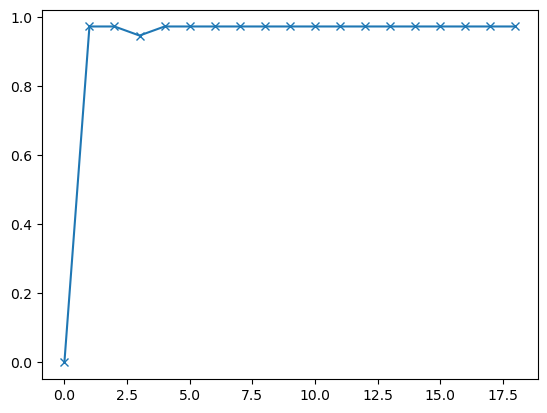

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
iris['target'], random_state=0)
result =np.empty(19)
for i in range(1,19):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(knn.score(X_test, y_test))

plt.plot(np.arange(19), result,marker="x")
